<a href="https://colab.research.google.com/github/vinosraj/codingdojo-exercise/blob/main/Project_02_part_4_VSR_04032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##project 2 (part 04)- Machine Learning

*   Vino Raj
*   04/03/2022


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
#Importing the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [ ]:
#data import
file_name1= '/content/drive/MyDrive/Coding Dojo/project 02/fetal_health.csv'

df = pd.read_csv(file_name1)

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Prepare/clean the data for exploratory analysis purposes




In [ ]:
# Explore the data (check dtypes, number of rows and columns, and check for null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Check for duplicates
df.duplicated().sum()

13

In [ ]:
duplicateRowsDF = df[df.duplicated(keep=False)]
duplicateRowsDF


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
67,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
229,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
233,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
304,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
323,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
326,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Lets explore the missing values

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Explore the data 
- [X] Create at least two different types of exploratory visualizations.
- [X] Write one to two sentences about what each visualization tells you about the data.

In [ ]:
# Visualize distribution of numerical values

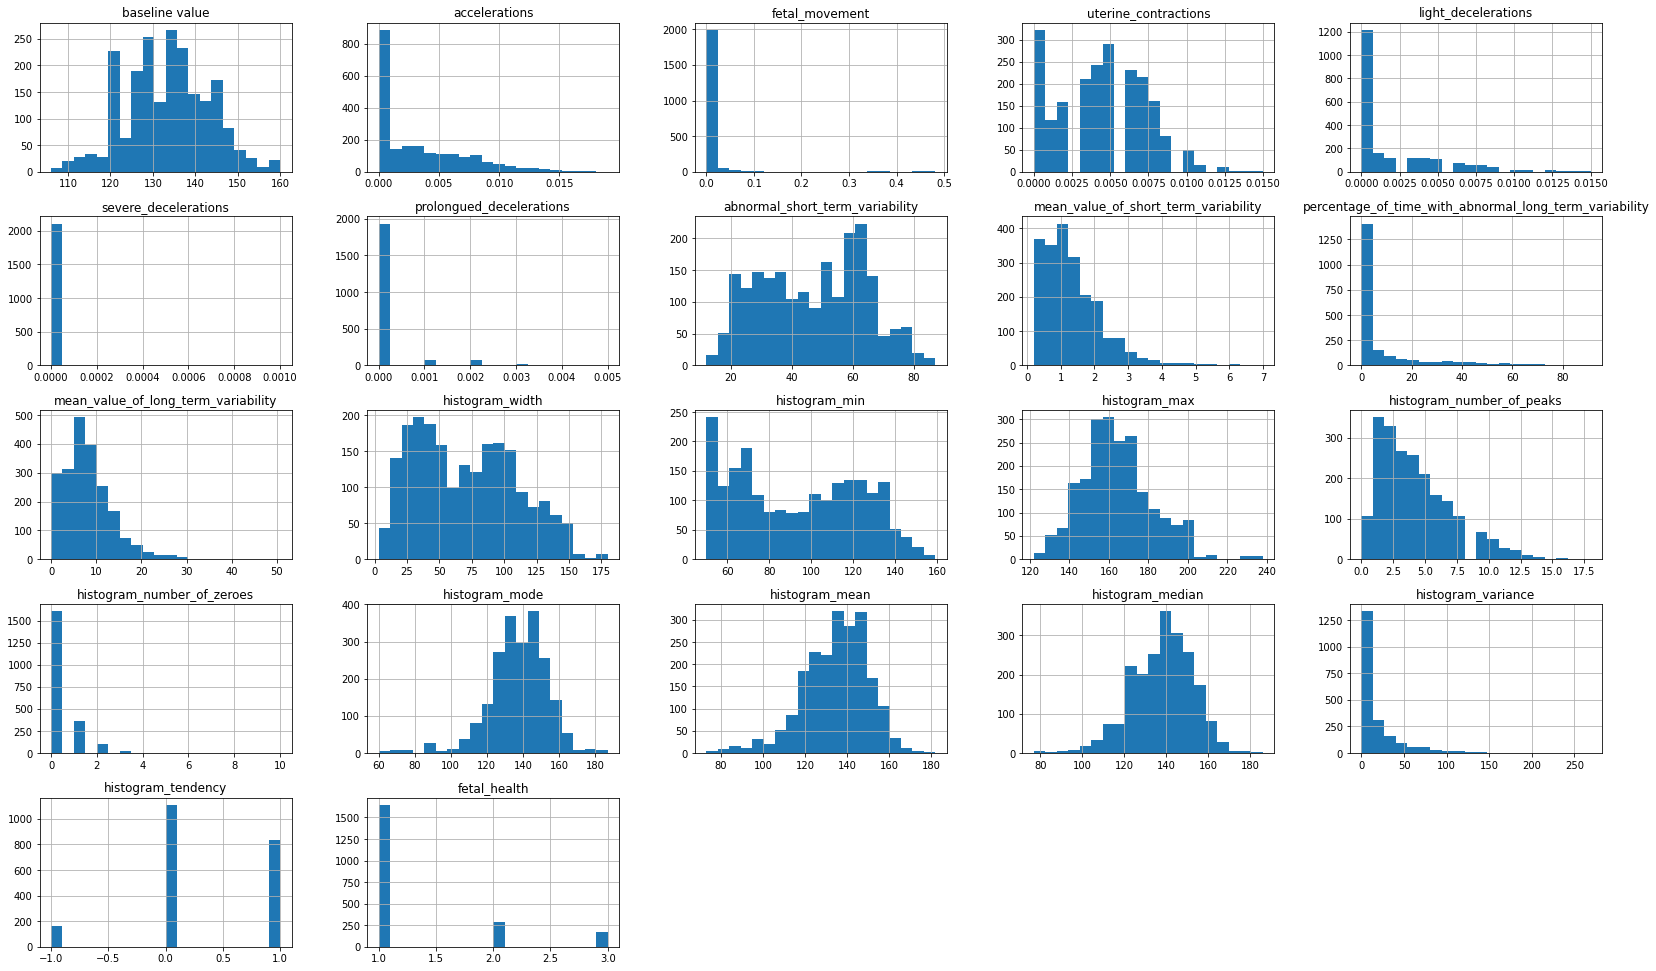

In [ ]:
df.hist(figsize=(28,17), bins = 20)
plt.show()

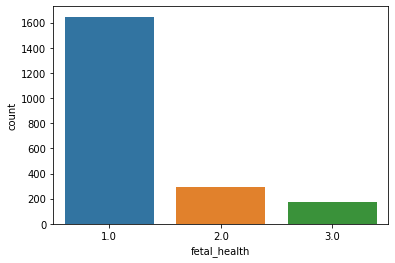

In [ ]:
import seaborn as sns
sns.countplot(data =df, x = "fetal_health")

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

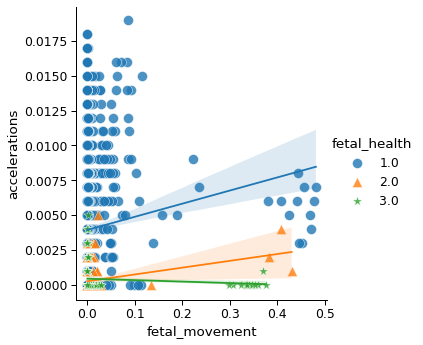

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

sns.lmplot(x='fetal_movement', y='accelerations', hue='fetal_health', data=df, markers=['o', '^','*'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})
plt.show()

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

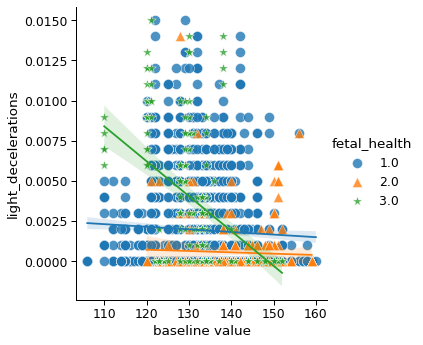

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

sns.lmplot(x='baseline value', y='light_decelerations', hue='fetal_health', data=df, markers=['o', '^','*'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

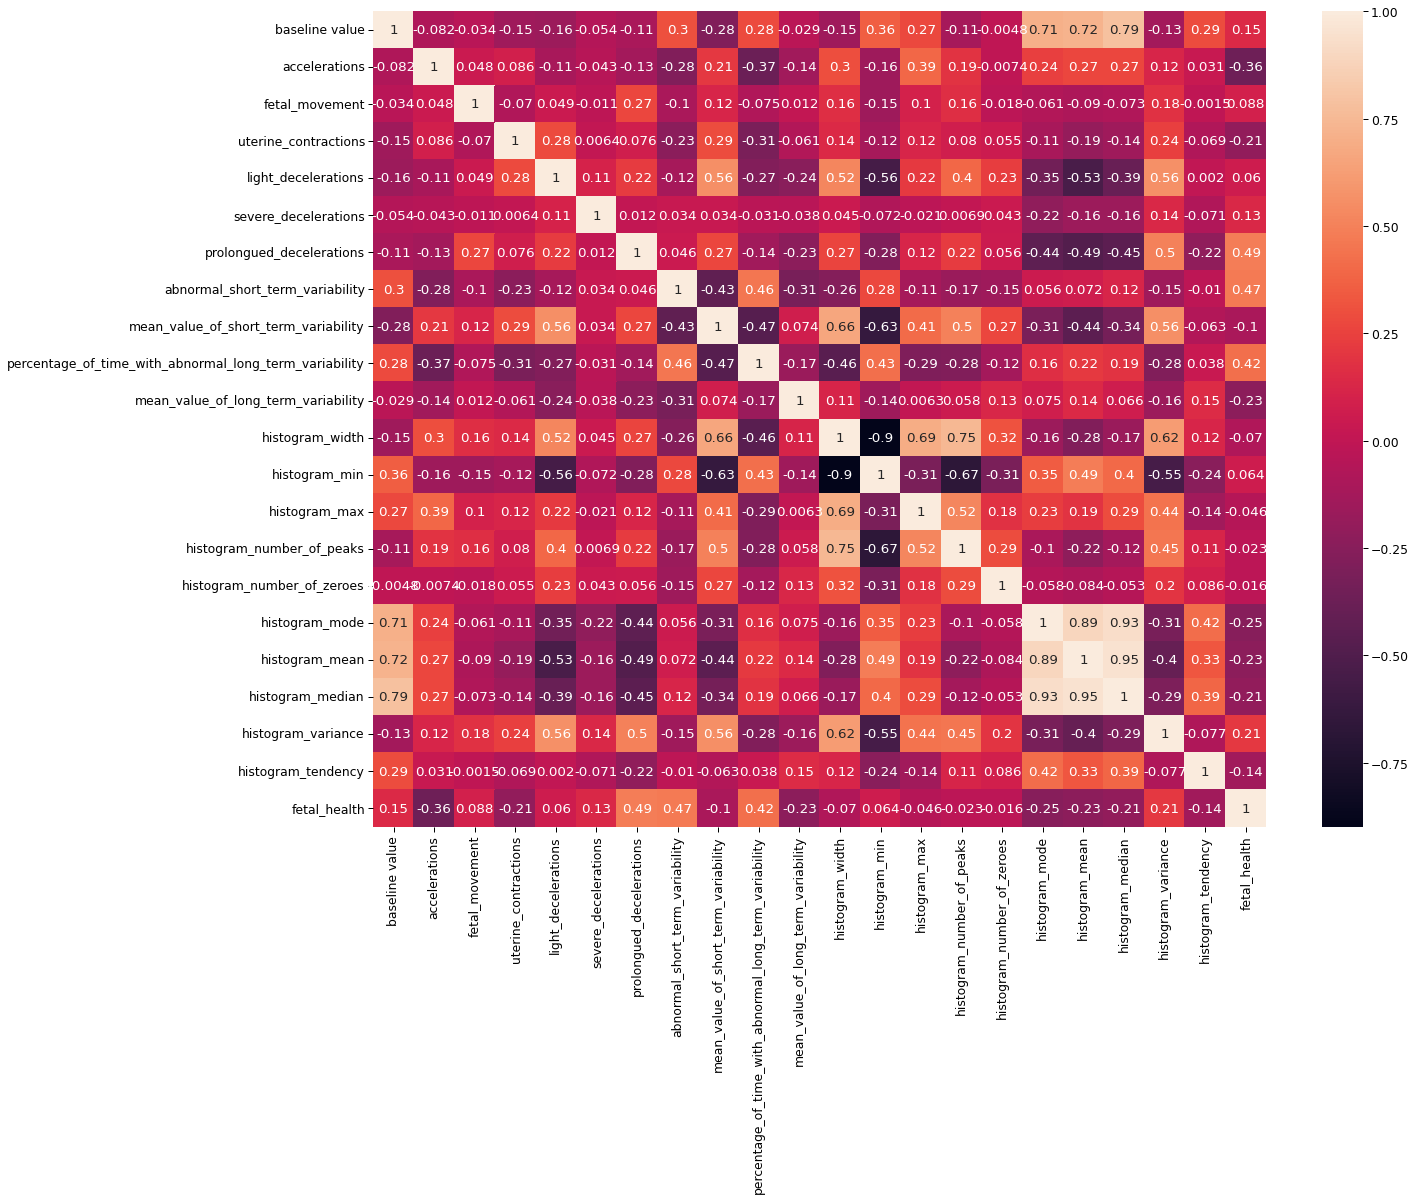

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)

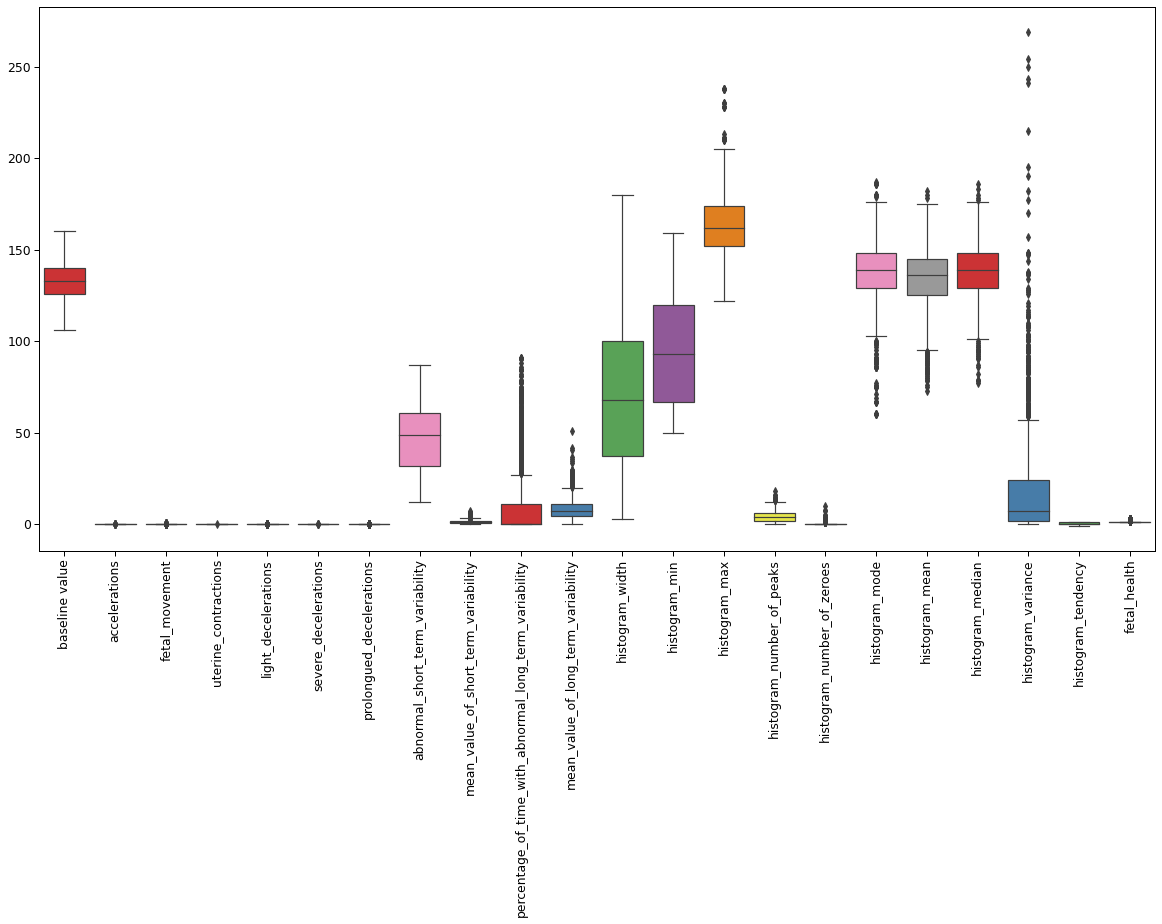

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Identify target vector and features matrix
X = df.drop(columns = 'fetal_health')
y = df['fetal_health']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,stratify=y)

In [ ]:
# Pre-Process for Machine Learning with a pipeline
# Dummy encode the categorical feature using OneHotEncoder 
# Scale the quantitative feature using StandardScaler 

#  categorical feature 
cat_feat = make_column_selector(dtype_include = 'object')
# quantitative features 
quant_feat = make_column_selector(dtype_include = 'number')

# Instantiate the column transformers 
encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

# Scale the data 
scaler = StandardScaler()

#Usin a Median imputer to impute values missing for the numeric columns
mean_imputer = SimpleImputer(strategy='median')

# using most frequent imputer to impute values for the categorical columns
freq_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [ ]:
num_tuple = (num_processor, quant_feat)
cat_tuple = (cat_processor, cat_feat)

In [ ]:
#  make the column transformer.
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

##KNN Classifier method 

In [ ]:
# Trying  a default KNN model in the pipeline 
# Instantiate the model
knn = KNeighborsClassifier()

# Make the pipeline...notice we included the column_transformer here
knn_pipe = make_pipeline(column_transformer, knn)

# Fit on training data only
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2cd697c50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
  

In [ ]:
# Evaluate the accuracy of the model with default settings
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

print('train accuracy', accuracy_score(y_train,train_preds))

print('\n')

print('test accuracy:', accuracy_score(y_test, test_preds))

train accuracy 0.9337121212121212


test accuracy: 0.888468809073724


Rather good results with the default

In [ ]:
# Hypertune the KNN model
knn_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2cd697c50>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                      

In [ ]:
# pararameters  to tune and the values to try

knn_params = {'kneighborsclassifier__n_neighbors': range(1, 20),
          'kneighborsclassifier__weights': ['uniform', 'distance'],
          'kneighborsclassifier__p': [2, 3, ]}

In [ ]:
# Instantiate the Gridsearch with the KNN pipeline and the knn_params 
knn_grid = GridSearchCV(knn_pipe, knn_params)

knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2cd697c50>),
                                                                        ('pipeline-2',
                                                                        

In [ ]:
# See which hyperparameters gave the best results
knn_grid.best_params_

{'kneighborsclassifier__n_neighbors': 7,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'distance'}

In [ ]:
# extract the best version of the model from the gridsearch object
best_knn = knn_grid.best_estimator_

In [ ]:
# Run a classification report on both train and test datasets for the best model. 
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

print('Best Model Training Metrics')
print(classification_report(y_train, train_preds))
print('\nBest Model Testing Metrics')
print(classification_report(y_test, test_preds))

Best Model Training Metrics
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1234
         2.0       1.00      1.00      1.00       219
         3.0       1.00      1.00      1.00       131

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584


Best Model Testing Metrics
              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       412
         2.0       0.74      0.59      0.66        73
         3.0       0.94      0.73      0.82        44

    accuracy                           0.90       529
   macro avg       0.87      0.76      0.81       529
weighted avg       0.90      0.90      0.90       529



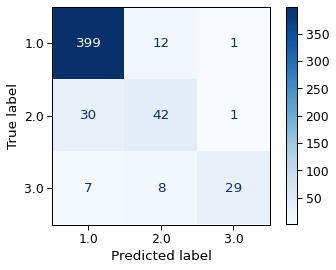

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, cmap='Blues')

A slight improvement with the tuning.

##Random forest Method

In [ ]:
# Try a default random forest model in the pipeline 
rf = RandomForestClassifier(random_state = 42)

# Make the pipeline and include the column_transformer
rf_pipe = make_pipeline(column_transformer, rf)
# Fit only on training data!
rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2cd697c50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
  

In [ ]:
# Evaluate the accuracy of the model with default settings
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

print('RF train accuracy', accuracy_score(y_train,train_preds))

print('\n')

print('RF test accuracy:', accuracy_score(y_test, test_preds))

RF train accuracy 0.9993686868686869


RF test accuracy: 0.9035916824196597


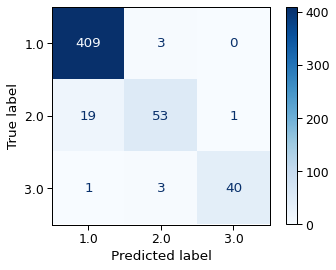

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_test, y_test, cmap='Blues')

In [ ]:
# will hypertune the random forest model.
rf_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2cd697c50>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                      

In [ ]:
# Define the hyperparameters you want to test.
rf_params = {'randomforestclassifier__max_depth' : [None, 5],
              'randomforestclassifier__min_samples_split' : [2, 4]}

In [ ]:
# Instantiate the Gridsearch with the Random Forest pipeline
rf_gs = GridSearchCV(rf_pipe, rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb2cd697c50>),
                                                                        ('pipeline-2',
                                                                        

In [ ]:
# See which hyperparameters gave the best results
rf_gs.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_split': 4}

In [ ]:
best_rf = rf_gs.best_estimator_

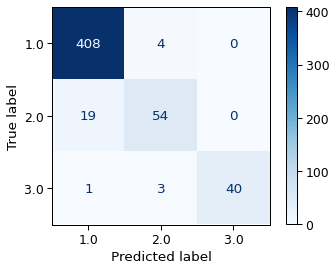

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')

In [ ]:
# Run a classification report on both train and test datasets for the best model. 
train_preds = best_rf.predict(X_train)
test_preds = best_rf.predict(X_test)

print('Random Forest Best Model Training Metrics')
print(classification_report(y_train, train_preds))
print('\nRandom Forest Best Model Testing Metrics')
print(classification_report(y_test, test_preds))

Random Forest Best Model Training Metrics
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1234
         2.0       0.99      0.98      0.98       219
         3.0       1.00      0.99      1.00       131

    accuracy                           1.00      1584
   macro avg       1.00      0.99      0.99      1584
weighted avg       1.00      1.00      1.00      1584


Random Forest Best Model Testing Metrics
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       412
         2.0       0.89      0.74      0.81        73
         3.0       1.00      0.91      0.95        44

    accuracy                           0.95       529
   macro avg       0.95      0.88      0.91       529
weighted avg       0.95      0.95      0.95       529



In [ ]:
# Run a classification report on both train and test datasets for the best model. 
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

print('KNN Best Model Training Metrics')
print(classification_report(y_train, train_preds))
print('\nKNN Best Model Testing Metrics')
print(classification_report(y_test, test_preds))

KNN Best Model Training Metrics
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1234
         2.0       1.00      1.00      1.00       219
         3.0       1.00      1.00      1.00       131

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584


KNN Best Model Testing Metrics
              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       412
         2.0       0.74      0.59      0.66        73
         3.0       0.94      0.73      0.82        44

    accuracy                           0.90       529
   macro avg       0.87      0.76      0.81       529
weighted avg       0.90      0.90      0.90       529



# Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
# instantiate dummy classifier, pipeline and fit pipeline
dummy = DummyClassifier(strategy = 'stratified', random_state=42)

dummy_pipe = make_pipeline(scaler, dummy)

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [ ]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=2, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes,
                                        ax=ax[0])
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  
#  curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
 # curve.ax_.grid()
  #curve.ax_.plot([0, 1], [0, 1], ls=':')

              precision    recall  f1-score   support

         1.0       0.81      0.82      0.81       412
         2.0       0.21      0.16      0.18        73
         3.0       0.15      0.18      0.16        44

    accuracy                           0.67       529
   macro avg       0.39      0.39      0.39       529
weighted avg       0.67      0.67      0.67       529



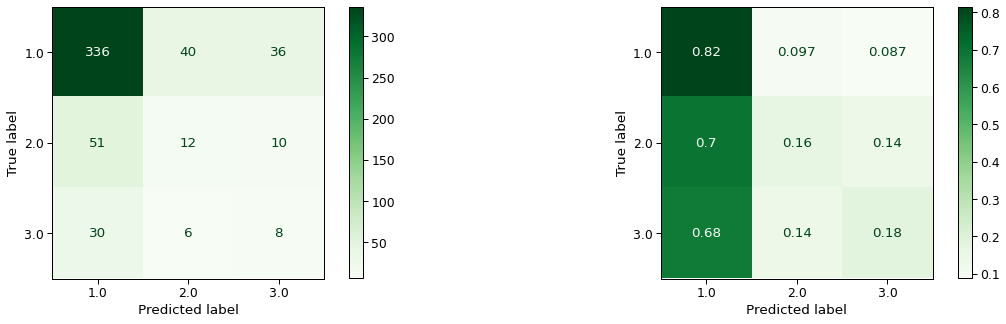

In [ ]:
# Evaluate function on the dummy pipe
evaluate_classification(dummy_pipe, X_test, y_test)

#Testing three boost systems to see which has the best value. 

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


              precision    recall  f1-score   support

         1.0       0.92      0.95      0.93       412
         2.0       0.67      0.60      0.63        73
         3.0       0.97      0.80      0.88        44

    accuracy                           0.89       529
   macro avg       0.85      0.78      0.81       529
weighted avg       0.89      0.89      0.89       529



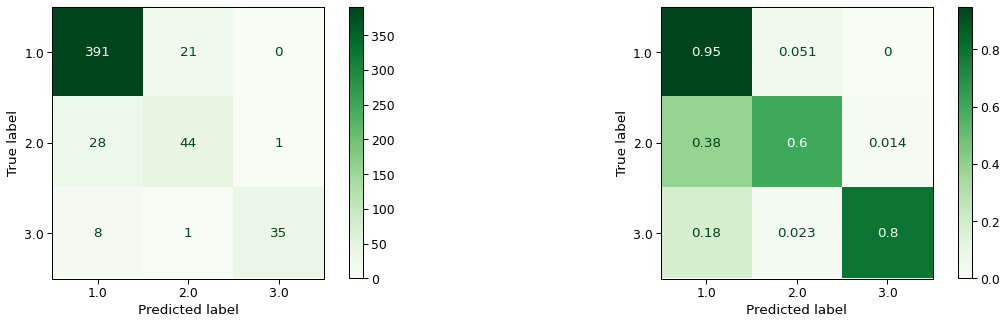

In [ ]:
ada_pipe = make_pipeline(column_transformer, AdaBoostClassifier())

ada_pipe.fit(X_train, y_train)

evaluate_classification(ada_pipe, X_test, y_test)

              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       412
         2.0       0.95      0.74      0.83        73
         3.0       0.98      0.93      0.95        44

    accuracy                           0.96       529
   macro avg       0.96      0.89      0.92       529
weighted avg       0.96      0.96      0.95       529



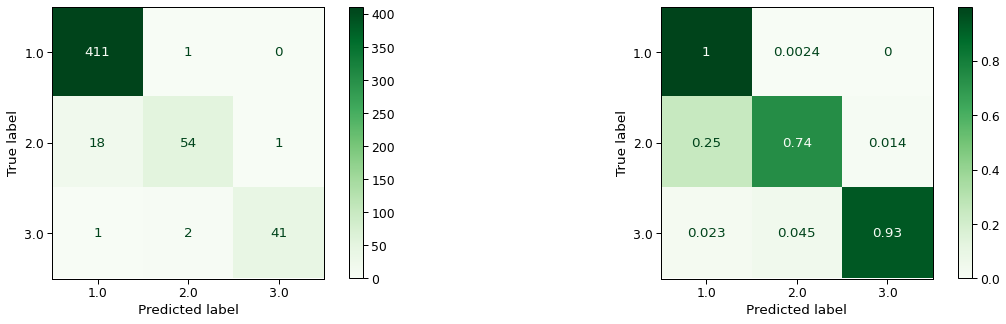

In [ ]:
lgb_pipe = make_pipeline(column_transformer, LGBMClassifier())

lgb_pipe.fit(X_train, y_train)

evaluate_classification(lgb_pipe, X_test, y_test)

              precision    recall  f1-score   support

         1.0       0.95      1.00      0.97       412
         2.0       0.93      0.71      0.81        73
         3.0       1.00      0.95      0.98        44

    accuracy                           0.95       529
   macro avg       0.96      0.89      0.92       529
weighted avg       0.95      0.95      0.95       529



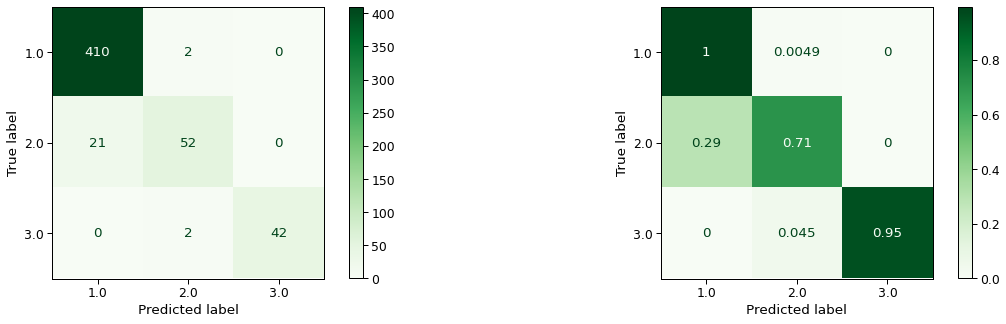

In [ ]:
xgb_pipe = make_pipeline(column_transformer, XGBClassifier())

xgb_pipe.fit(X_train, y_train)

evaluate_classification(xgb_pipe, X_test, y_test)



In [ ]:
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         1.0       0.97      0.89      0.93       412
         2.0       0.55      0.79      0.65        73
         3.0       0.74      0.80      0.77        44

    accuracy                           0.87       529
   macro avg       0.76      0.83      0.78       529
weighted avg       0.89      0.87      0.88       529



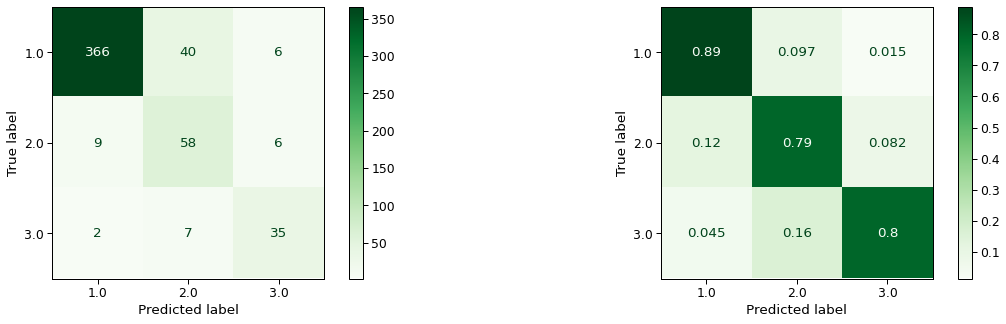

In [ ]:
log_reg = make_pipeline(column_transformer, LogisticRegression(class_weight='balanced'))

log_reg.fit(X_train, y_train)

evaluate_classification(log_reg, X_test, y_test)

The best results are from LightGBM booasting so will be choosing this method. 

Will apply lightGBM boosting to the Random Forest as we got the best results from this model.

Stacking Models Adapted from sklearn ensemble example \
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [ ]:
from sklearn.ensemble import StackingClassifier


In [ ]:
# Re-Identify target vector and features matrix for testing
X2 = df.drop(columns = 'fetal_health')
y2 = df['fetal_health']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [ ]:
estimators = [
    ("Random Forest", RandomForestClassifier(max_depth=None, min_samples_split=4)),
    ("LGBM Boosting", make_pipeline(column_transformer, LGBMClassifier()))
    ]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(min_samples_split=4)),
                               ('LGBM Boosting',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='median')),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                               

In [ ]:
clf.fit(X2_train, y2_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(min_samples_split=4)),
                               ('LGBM Boosting',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='median')),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                               

In [ ]:
clf.fit(X2_train, y2_train).score(X2_test, y2_test)

0.945179584120983

In [ ]:
clf_train_preds = clf.predict(X2_train)
clf_test_preds = clf.predict(X2_test)

print('Random Forest Best Model Training Metrics')
print(classification_report(y2_train, clf_train_preds))
print('\nRandom Forest Best Model Testing Metrics')
print(classification_report(y2_test, clf_test_preds))


Random Forest Best Model Training Metrics
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1237
         2.0       1.00      1.00      1.00       220
         3.0       1.00      1.00      1.00       127

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584


Random Forest Best Model Testing Metrics
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       409
         2.0       0.88      0.74      0.80        72
         3.0       0.96      0.92      0.94        48

    accuracy                           0.95       529
   macro avg       0.93      0.88      0.90       529
weighted avg       0.94      0.95      0.94       529



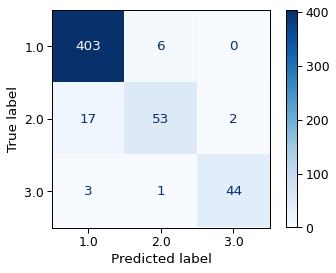

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X2_test, y2_test, cmap='Blues')

The resulting scores for LightGBM boosting with Random forest model has a igh accuracy and F1 score. 

I am opting out of PCA as the data set dimentionality is rather low and there doesnt seem to need an feature engineering too.